# Do I Have A "Good Music Taste"?
#### December 2018
_Sam Tsoi_

## Introduction

I have been listening to music for as long as I can remember. I can't remember the last day in my life where I didn't I didn't listen to music in some way or form. At the start of this class, I was really motivated and excited about this coming final project, and I had told myself that this was my chance to do something meaningful and personal to me. I didn't want this class to just be another class where I had to study for but I wanted this class to help me build up my data cleaning and visualizing skills, and that this final project would be my chance to express some creativity. I have been using Spotify Premium since early high school (you can guess how much that's cost me: \$9.99/month...) and I have used it as my main source of music consumption ever since. Just like people change and grow up, I would like to say and think that my music taste has done the same. In this project, I will explore if that is really true. 
<br>
<br>
What really pushed me to explore my music listenings was the infamous yearly "Wrapped" Spotify came out with at the end of 2017 (I attached mine below). While many people praised it for the data collection and analysis, my friends and I, being the music nerds we are, questioned its credibility as well as our music taste, and wondered about how they came up with the top categories, such as top songs, top artists, and top genres. There were certain songs and features that we felt like were favored over another, like pop and hip-hop songs. In my "Wrapped", my top genre was "Indie Rock", but all 5 of my top songs were hip-hop and pop.  Even the "Discovery Weekly", a playlist that Spotify curates weekly unique to the user based on his or her music taste, we found could be a little "sketchy". Could it be a possibility that Spotify recommends songs based on their profit on the song if they had streamed it? For example, could Spotify profit more $ per song for certain songs if an artist had agreed to let them stream it for less in an effort to self-promote? Spotify always prided themselves as "being entirely data driven". However, are they so smart about data that they can manipulate recommendations in their favor? We will explore some of these questions in this project. If you are as excited as I am about this, read on!

A disclaimer: I am a very, very local Spotify user, and I am not even sure if it is possible for artists to "allow their songs to stream for less", or about the politics of music streaming. This project is purely based on my curiosity of my own music taste, how Spotify reacts to what I listen to, and how my music compare with that of the rest of the world.

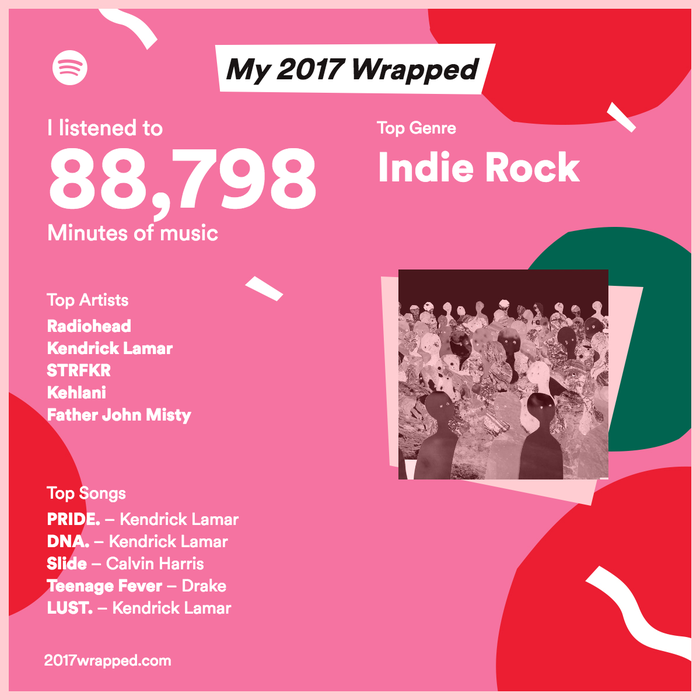

In [1]:
#let's display my 2017 wrapped from Spotify
import sys
sys.path.append("/Users/samanthatsoi/anaconda3/lib/python3.6/site-packages")
from PIL import Image
img = Image.open("spotify-2017-wrapped.png")

#resizing image
basewidth = 700
wpercent = (basewidth/float(img.size[0]))
hsize = int((float(img.size[1])*float(wpercent)))
img = img.resize((basewidth,hsize), Image.ANTIALIAS)
img

## Questions

#### 1. How has my music changed?
<br>
#### 2. How does my music compare to what is currently popular?
<br>
For fun,
#### 3. How good am I at guessing my own music taste?
<br>
And for the most exciting one,
#### 4. How good is Spotify at guessing and recommending me music?

## Methods

To find my own Spotify music, I had to use the Spotify API as well as the Spotipy, a package to access the Spotify API in Python scripts. Spotipy allows access to all the music data on the Spotify platform, with user authorization and permission from Spotify. <br>
Using Spotipy, I was able to extract songs from my library, the audio features from each, and put it in a clean pandas dataframe. I had to register with Spotify developer in order to get authorization and credentials to go ahead with this project. Spotify API required an ID, a secret code, and tokens according to what we are looking for in the music data. In order to get exactly what I was looking for, time spent cleaning and wrangling, joining different dataframes, and testing out what could make the dataset the cleanest I could get it to be was what I spent the majority of my time on in this project. As you can see in my code later on, I eventually had to save different dataframes into .csv files because they had gotten really big with the data features I was able to obtain through spotify. Additionally, putting the datasets into a .csv file made it easier for authorization because Spotify requires the token be reset every once in a while. By exporting, munging, and storing, I would not have to worry about a token. To answer the first question, I did this for getting my top artists, my top tracks, all my music from my music library, and all my music that I have manually saved onto playlists. Secondly, in order to compare my music, I was able to find a datasest online that probably did something similar to what I did, and found the tracks and audio features for 100 Top songs of 2017. This was perfect for my analysis, as 2017 was the first year I had gotten my "Wrapped". Thirdly, Spotify allows users to make playlists and manually add tracks to these playlists that listeners can share with others as well as reference to later on. I compiled each track from my playlist and audio features for these tracks. Lastly, I looked at datasets from "Discover Weekly", a playlist that Spotify curates weekly unique to each user based on the user's music taste, and compiled each track and its audio features.

_Note: I created an appendix at the end of this project that can be referenced to further understand what each term means and its definition (long-term, short-term, audio feature, etc.)._

## Data Analysis

In [2]:
#let's install some packages to start off this project
import sqlite3 as sql
import pandas as pd
import geopandas as gpd         # conda install -c conda-forge geopandas
import osmnx as ox              # conda install -c conda-forge osmnx
import shapely.geometry as geom # conda install -c conda-forge shapely
import numpy as np
# to display plots in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
import os
import spotipy
from __future__ import print_function    # (at top of module)
from spotipy.oauth2 import SpotifyClientCredentials
import json
import sys
import requests
from math import ceil
import spotipy.util as util
import simplejson as json
import seaborn as sns
import ggplot
from ggplot import *

from scipy import stats

os.chdir("/Users/samanthatsoi/sta141b-proj--sam-t/")

/Users/samanthatsoi/anaconda3/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/Users/samanthatsoi/anaconda3/lib/python3.6/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/Users/samanthatsoi/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
#user authorization to use spotify api
SPOTIPY_CLIENT_ID = '46f9140819384eb399ea41cc52337c61'
SPOTIPY_CLIENT_SECRET = '541b92db336e47caa0fea18c7c260239'
SPOTIPY_REDIRECT_URI= 'http://www.google.com'
cid = SPOTIPY_CLIENT_ID
secret = SPOTIPY_CLIENT_SECRET
redirect = SPOTIPY_REDIRECT_URI

#my username
username = '1220915143'
username = '1252457664'
#token, this needs to be updated around every hour as it expires
#token = 'BQANpyCVwTWiyJjG7AM8W1K9R1dGGqEfVcgHD7PdI6QJEzbdETaFZ1aeJwegqfEgGJaIAYHUBQjQjomKG-sBIcRQLsaCgyYvgZzVaQCuqIfuvAni-3fnjQVUueaqz7S_iL5DbZVGj1PSkAY2Y-gYdPKe52QwcJ9Y3J7jeFU-di6-2x81KJkiiRXdaOKMLLuHL5bAFYyJPH1ZGIZ8qth5fjIk18kptftQI4Ssles6AhY'
#token ='BQDZkSMyhoEPtOkaFPPUoh8lfvixiH0CZ_bq-CXrzKMXUc4dIkvZWRZrDZ80kO1HhHr6lBVokyol0JZbvGfMPmMlCFyXbRxHQ6Peu255DG9InzkZ0Xn7tk-RxsNcoacwqogaWIn83juWpc3Dfr1lKGI5-ssXG2Z9bl8BtzXhUPgRRv8doZftQzzQ6QbMVUbgci_oBzzQSaB7jCSZJ3uzFRDwvkGeQtZb4NBZKvbCSIoa06gzuJxcBqCoaIwrdRUXf2uI1jRY'
token = 'BQDbOcuY0MC57QerFlHMSN_USFIOL6YF6pP99DxpJPDzYTucgqpVxuGS3K-zr-p5QT4YoS6SKPC1jAgYMaTvHqSY3H1r1CF0n1VJmdJGESdBloa9JLiDvh4NEjgDHefw2byLUd6mqj9SDLrGPVX8osqTbOKmrBiDmwF--bkrxr_SSUw_b6Aw13TSQ2qMLTHrhiyrscI8sKmCqorqRG9-Y6mr5oR0ncM'

In [36]:
###NEED TO GRAB TOKEN FOR THIS TO WORK

#Just for fun, this is code gives me my top artists, long-term, medium-, and short-term
# I don't use it for this data, but this would be useful in other data analysis questions
artistsdf = pd.DataFrame(columns = ['range', 'artist'])
if token:
    sp = spotipy.Spotify(auth=token)
    sp.trace = False
    ranges = ['short_term', 'medium_term', 'long_term']
    for range in ranges:
        print("range:", range)
        results = sp.current_user_top_artists(time_range=range, limit=50)
        for i, item in enumerate(results['items']):
            print(i, item['name'])
        print
else:
    print("Can't get token for", username)

range: short_term
0 The Smiths
1 Porches
2 John Fahey
3 Parquet Courts
4 Emily Yacina
5 Danish String Quartet
6 Rhye
7 Girl Ray
8 Triathalon
9 MGMT
10 Anna McClellan
11 Ryuichi Sakamoto
12 Stars Of The Lid
13 Blanche Blanche Blanche
14 (Sandy) Alex G
15 The Swingle Singers
16 La Santa Cecilia
17 21 Savage
18 Hovvdy
19 Bing & Ruth
20 Jim Croce
21 Brian Eno
22 Banes World
23 Mild High Club
24 BROCKHAMPTON
25 Lorde
26 The Four Freshmen
27 James Blake
28 Loving
29 Joey Pecoraro
30 Thundercat
31 Julie Byrne
32 Rina Sawayama
33 Car Seat Headrest
34 Phoebe Bridgers
35 Oister
36 Nilüfer Yanya
37 Eluvium
38 Rostam
39 Joe Pass
40 Kanye West
41 Inner Wave
42 J.I.D
43 Pantha Du Prince
44 Everything Is Recorded
45 Art Tatum
46 Harold Budd
47 Gus Dapperton
48 Ravyn Lenae
49 The Shacks
range: medium_term
0 The Beach Boys
1 John Fahey
2 Drake
3 The Smiths
4 Porches
5 Kendrick Lamar
6 Parquet Courts
7 BROCKHAMPTON
8 Young Thug
9 (Sandy) Alex G
10 Emily Yacina
11 Tame Impala
12 Nils Frahm
13 Sufjan Stev

In [38]:
if token:
    sp = spotipy.Spotify(auth=token)
    sp.trace = False
    ranges = ['short_term', 'medium_term', 'long_term']
    for range in ranges:
        print("range:", range)
        results = sp.current_user_top_tracks(time_range=range, limit=50)
        for i, item in enumerate(results['items']):
            print(i, item['name'], '//', item['artists'][0]['name'])
        print
        
else:
    print("Can't get token for", username)

range: short_term
0 Largo [Harpsichord Concerto No. 5 in F minor BWV 1056] // The Swingle Singers
1 Good Graces // Emily Yacina
2 Foldin Clothes // J. Cole
3 Everybody's Got To Learn Sometime // The Korgis
4 Harpsichord Suite No. 11 in D minor, HWV 437 (Theme from the folm "Barry Lyndon)) - Sarabande // George Frideric Handel
5 When You Die // MGMT
6 Waste // Rhye
7 Holding on Too Tight // Anna McClellan
8 But at the Same Time // Anna McClellan
9 She Refused to Say // Loving
10 Wat's Wrong (feat. Zacari & Kendrick Lamar) // Isaiah Rashad
11 Song For You // Rhye
12 I Promise You - Ezra's Demo // Ezra Koenig
13 It Just Makes Sense // Anna McClellan
14 She Works Out Too Much // MGMT
15 Blood Knows // Rhye
16 あこがれ // mitsume
17 Feel Your Weight // Rhye
18 So Easy // Emily Yacina
19 Rush // Jay Som
20 Glow - Water Version // Porches
21 Little Dark Age // MGMT
22 Sarah (Bonus Track) // (Sandy) Alex G
23 America // Bekon
24 Sometimes // Triathalon
25 Nail-Biting Song // Anna McClellan
26 Plea

In [4]:
#TO START OFF! let's look at how many music is saved onto my library 
url = "https://api.spotify.com/v1/me/tracks"
headers = {'Authorization': "Bearer {}".format(token)}
r = requests.get(url, headers=headers)
parsed = json.loads(r.text)

count_songs = parsed["total"]
print ("Total number of songs: {}".format(count_songs))

Total number of songs: 249


### 1. How has my music changed?


#### Data Exploration

In [5]:
#grabbing my top songs AND ALSO audio features for each song.

###################################################################################
### THIS TAKES A WHILE TO COMPILE, WHICH IS WHY IT IS EXPORTED TO .CSV LATER ######
###################################################################################

topsongsdf = pd.DataFrame(columns = ['range', 'song_name', 'artist'])
if token:
    sp = spotipy.Spotify(auth=token)
    sp.trace = False
    ranges = ['short_term', 'medium_term', 'long_term']
    for range in ranges:
      #  topsongsdf['range'] = 1 #print("range:", range)
        results = sp.current_user_top_tracks(time_range=range, limit=50)
        for i, item in enumerate(results['items']):
            ser = pd.Series([range, item['name'],item['artists'][0]['name']], index = ['range', 'song_name', 'artist'])
            tid = 'spotify:track:' + item['id']
            features = sp.audio_features(tid)
            featdf = pd.Series(features[0])
            completedescript = pd.concat([ser,featdf])
            topsongsdf = topsongsdf.append(completedescript,ignore_index=True)
    #        topsongsdf['artist'] = item['artists'][0]['name'] #print(i, item['name'], '//', item['artists'][0]['name'])
        print

else:
    print("Can't get token for", username)

In [6]:
#export it so we can access to it even after token is lost
topsongsdf.to_csv("topsongs.csv", index=False)
topsongsdf2 = pd.read_csv("topsongs.csv")
topsongsdf2.head()

,range,song_name,artist,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,...,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence
0,short_term,Largo [Harpsichord Concerto No. 5 in F minor B...,The Swingle Singers,0.9750,https://api.spotify.com/v1/audio-analysis/7pBR...,0.497,183440.0,0.0173,7pBRrOvcE2ZMiR5k891vhx,0.000359,...,0.0846,-19.526,1.0,0.0394,112.632,4.0,https://api.spotify.com/v1/tracks/7pBRrOvcE2ZM...,audio_features,spotify:track:7pBRrOvcE2ZMiR5k891vhx,0.2590
1,short_term,Good Graces,Emily Yacina,0.8680,https://api.spotify.com/v1/audio-analysis/0TcA...,0.454,132261.0,0.0714,0TcAUHfV9Nt2y5sUowxkCA,0.000043,...,0.1380,-19.849,1.0,0.0295,94.070,4.0,https://api.spotify.com/v1/tracks/0TcAUHfV9Nt2...,audio_features,spotify:track:0TcAUHfV9Nt2y5sUowxkCA,0.2340
2,short_term,Foldin Clothes,J. Cole,0.2180,https://api.spotify.com/v1/audio-analysis/77IA...,0.713,316920.0,0.4960,77IAeEz8LEchPN8UNjaTJ2,0.000237,...,0.0761,-10.045,0.0,0.3110,162.039,4.0,https://api.spotify.com/v1/tracks/77IAeEz8LEch...,audio_features,spotify:track:77IAeEz8LEchPN8UNjaTJ2,0.6000
3,short_term,Everybody's Got To Learn Sometime,The Korgis,0.0154,https://api.spotify.com/v1/audio-analysis/2Pxy...,0.425,251947.0,0.2980,2PxyiPwogw6C9yu1jRgFiA,0.001330,...,0.0725,-12.037,0.0,0.0258,75.038,4.0,https://api.spotify.com/v1/tracks/2PxyiPwogw6C...,audio_features,spotify:track:2PxyiPwogw6C9yu1jRgFiA,0.0929
4,short_term,"Harpsichord Suite No. 11 in D minor, HWV 437 (...",George Frideric Handel,0.9830,https://api.spotify.com/v1/audio-analysis/6Nw7...,0.356,243067.0,0.0336,6Nw7jagICoXFt1ZtdAbi8o,0.864000,...,0.1070,-19.747,0.0,0.0435,139.584,3.0,https://api.spotify.com/v1/tracks/6Nw7jagICoXF...,audio_features,spotify:track:6Nw7jagICoXFt1ZtdAbi8o,0.2100


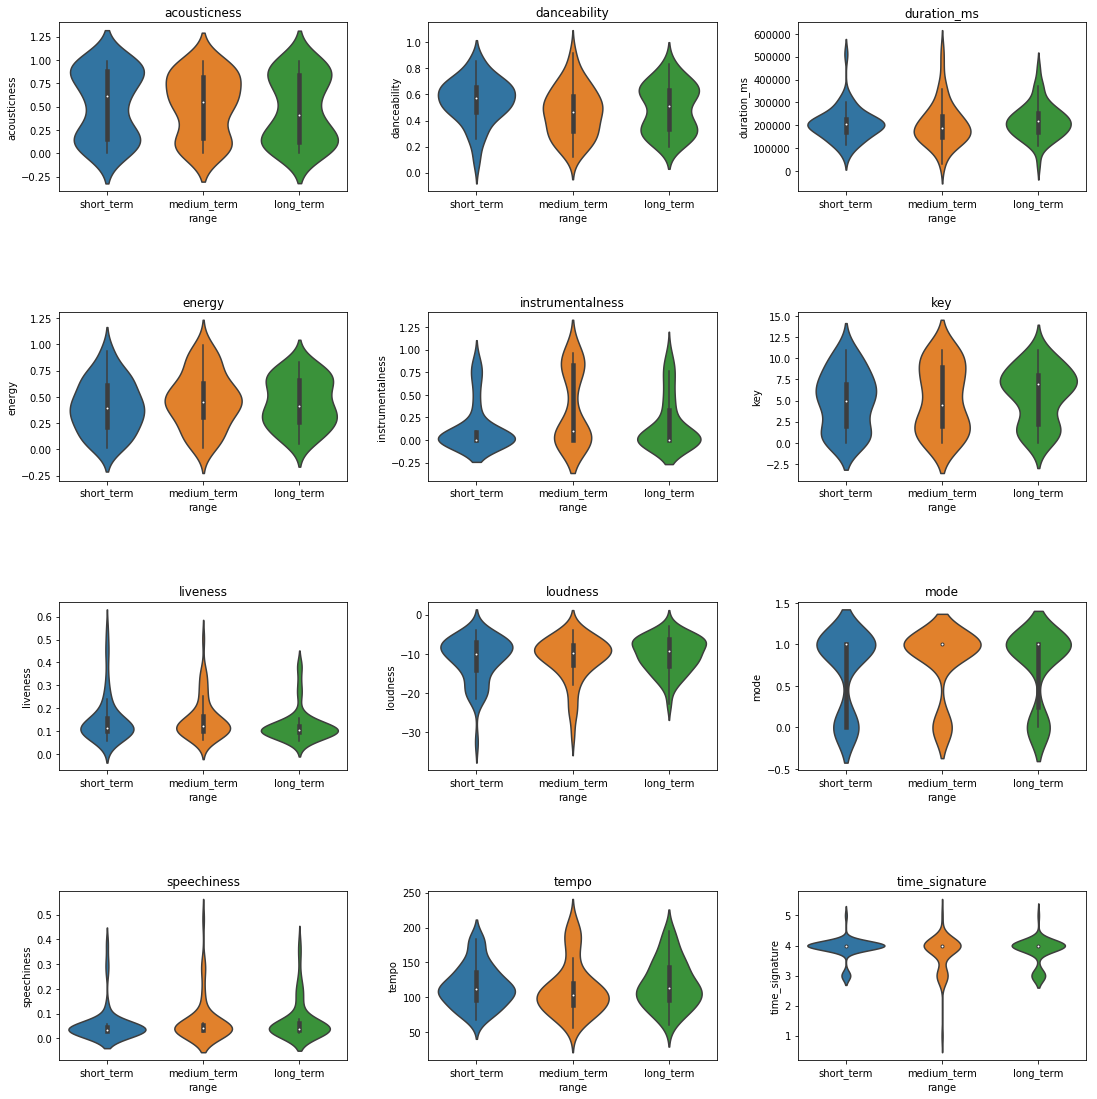

In [7]:
fig, axes = plt.subplots(4,3, figsize=(15,15))
fig.tight_layout(h_pad = 10, w_pad = 5)
index = [3,5,6, 7,9,10,11,12,13,14,15,16] #these are the columns that can be compared #these are the columns that can be compared
i =0
for triaxis in axes:
    for axis in triaxis:
        sns.violinplot(x='range', y= topsongsdf2.columns[index[i]], data=topsongsdf2, ax=axis) 
        axis.set_title(topsongsdf2.columns[index[i]])
       # axis.scatter(columnstoplot[i], ax=axis)
        i += 1
plt.show()

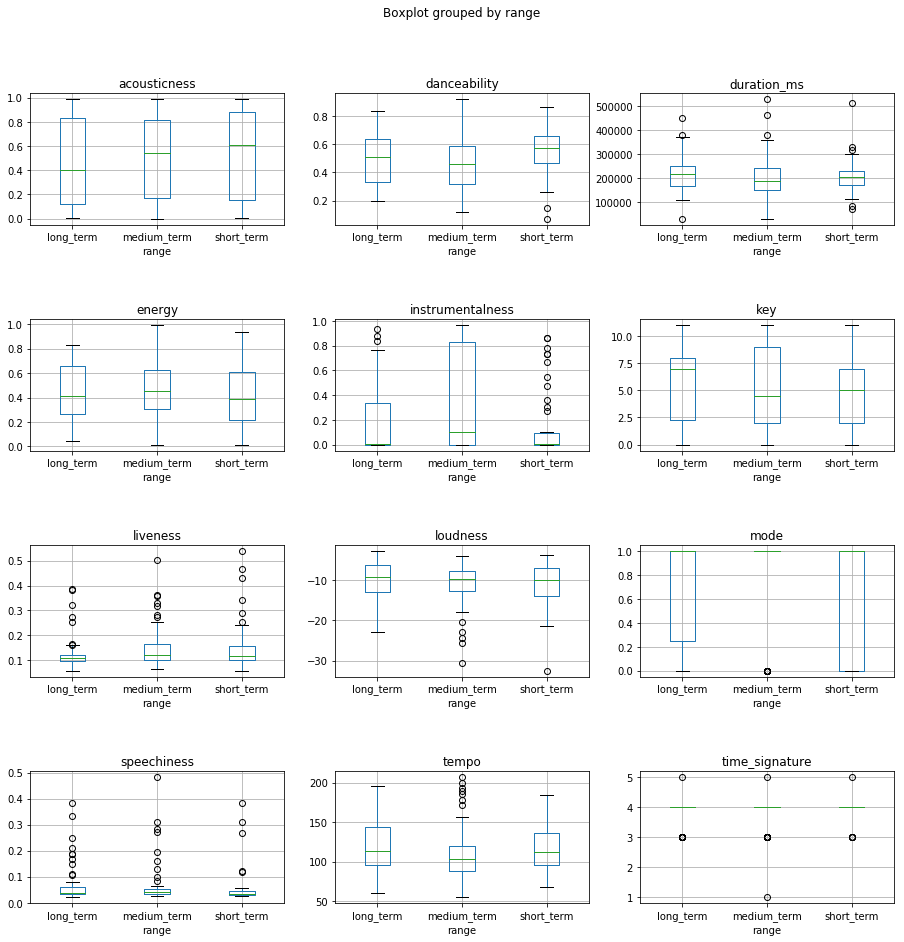

In [8]:
#comparing short-term, middle-term, and long-term audio features

#BOXPLOT
fig, axes = plt.subplots(4,3, figsize=(15,15))
fig.tight_layout(h_pad = 10)
index = [3,5,6, 7,9,10,11,12,13,14,15,16] #these are the columns that can be compared
i =0
for triaxis in axes:
    for axis in triaxis:
            topsongsdf2.boxplot(column = topsongsdf2.columns[index[i]], by ='range', showcaps=True, 
           showbox=True, ax=axis)
            i += 1
plt.show()
#topsongsdf2.columns[10]

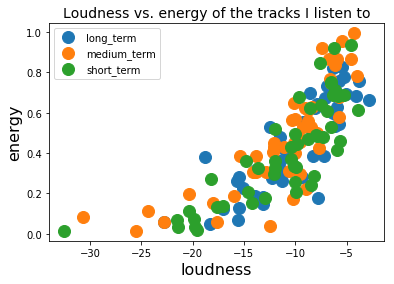

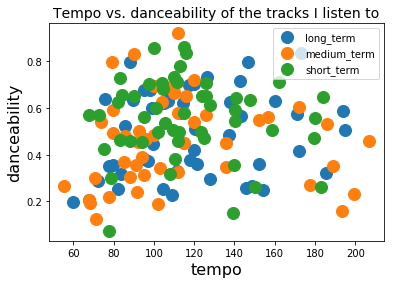

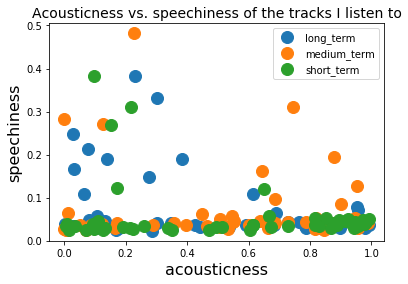

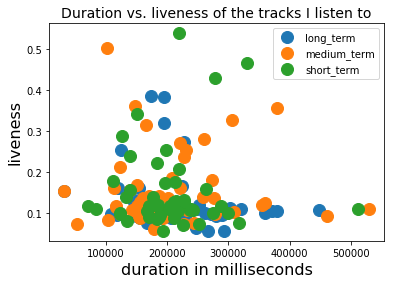

In [9]:
#comparing TWO variables with the three groups
#didn't do subplots because I need to carefully choose which x and y to compare

groups = topsongsdf2.groupby('range')
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.loudness, group.energy, marker='o', linestyle='', ms=12, label=name)
    ax.set_title(name)
#ax.plot(df.loudness, df.energy, marker='o', linestyle='', ms=12)
ax.set_title("Loudness vs. energy of the tracks I listen to", fontsize = 14)
plt.ylabel("energy", fontsize = 16)
plt.xlabel("loudness", fontsize = 16)
ax.legend()

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.tempo, group.danceability, marker='o', linestyle='', ms=12, label=name)
    ax.set_title(name)
ax.set_title("Tempo vs. danceability of the tracks I listen to", fontsize = 14)
plt.ylabel("danceability", fontsize = 16)
plt.xlabel("tempo", fontsize = 16)
ax.legend()

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
  #  print(group.mode, "$$$$$$$$$$$", group.danceability)
    ax.plot(group.acousticness, group.speechiness, marker='o', linestyle='', ms=12, label=name)
  #  ax.set_title(name)
ax.set_title("Acousticness vs. speechiness of the tracks I listen to", fontsize = 14)
plt.ylabel("speechiness", fontsize = 16)
plt.xlabel("acousticness", fontsize = 16)
ax.legend()

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
  #  print(group.mode, "$$$$$$$$$$$", group.danceability)
    ax.plot(group.duration_ms, group.liveness, marker='o', linestyle='', ms=12, label=name)
  #  ax.set_title(name)
ax.set_title("Duration vs. liveness of the tracks I listen to", fontsize = 14)
plt.ylabel("liveness", fontsize = 16)
plt.xlabel("duration in milliseconds", fontsize = 16)
ax.legend()

#### Statistics

In [10]:
groups = topsongsdf2.groupby('range')
columnstoplot = ['danceability','energy','key','loudness','mode','speechiness','acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo','duration_ms','time_signature']
for i in columnstoplot:
    shorty = []
    midy = []
    longy = []
    for name, group in groups:
        if name == "short_term":
            shorty.append(group[i])
        if name == "medium_term":
            midy.append(group[i])
        if name == "long_term":
            longy.append(group[i])
    #print(i, shorty[0])
    kw = stats.kruskal(shorty[0], midy[0], longy[0])
    print("P-value for the Kruskal-Wallis test between short-, medium-, and long-term ", i, " is: ", kw[1])


P-value for the Kruskal-Wallis test between short-, medium-, and long-term  danceability  is:  0.028752947147060472
P-value for the Kruskal-Wallis test between short-, medium-, and long-term  energy  is:  0.4718437364448118
P-value for the Kruskal-Wallis test between short-, medium-, and long-term  key  is:  0.5090461662650415
P-value for the Kruskal-Wallis test between short-, medium-, and long-term  loudness  is:  0.7250963610962526
P-value for the Kruskal-Wallis test between short-, medium-, and long-term  mode  is:  0.5141817013471488
P-value for the Kruskal-Wallis test between short-, medium-, and long-term  speechiness  is:  0.23327836840475225
P-value for the Kruskal-Wallis test between short-, medium-, and long-term  acousticness  is:  0.6736900044366501
P-value for the Kruskal-Wallis test between short-, medium-, and long-term  instrumentalness  is:  0.038829666128654364
P-value for the Kruskal-Wallis test between short-, medium-, and long-term  liveness  is:  0.07173839013055

#### Analysis

_Note: I created an appendix at the end of this project that can be referenced to throughout this project further understand what each term means and its definition (long-term, short-term, each audio features, etc.)._

From the violin and the boxplots, I used both methods for different types of visuals that one plot can offer and the other one can't. The violin gives us a general sense of how different the different groups are, and the boxplot is able to tell us IQR and the specifics of each difference. As we can see, the certain features of tracks differed by different terms more than others. The 4 that changed most significantly from each group are "acousticness", "danceability", "key", and "speechiness". From what "acousticness" means, it seems like I have listened to more acoustic songs recently than compared to overall and that of the past. It also seems like from "danceability" that I have listened to more tracks that are less "danceable" recently than overall or than in the past. Based on what has happened and the events recently, this totally makes sense to me. I tend to listen to more "acoustic" and less "dance-y" music when I am studying or in school. I use music a lot of time to calm myself down and to re-center, so it makes sense that the music recently is more "down-tempo" than other times I listen. From "key", it seems like this varies by short-term (recently), middle-term (relatively recently), long-term (all-time) (definition in appendix!). More recently than ever, I have listened to tracks with keys that are higher. From "speechiness", the IQR of short-term is way smaller than long-term, which means that my music "speechiness" doesn't vary as much as it did overall. It also seems like my music "speechiness" has decreased overtime. This kind of makes sense. I feel like I listened to a lot of hip-hop music in high school, but I have been getting more into rock music as time goes on. <br> In order to further my analysis, I decided to plot certain two variables that I feel like might have a relationship with each other. For example, in the "Loudness vs. energy of the tracks I listen to" plot, we can see that there is clearly a relationship, as correlation is closer to 1 than the other plots. It seems like the louder the music, the more energy the track has.It seems like my long-term, overall music tends to be more upbeat than the music I have been listening to recently, which makes sense given the trend I mentioned earlier. Tempo and danceability, on the other hand, doesn't seem like there is a relationship. The points seem to be very random. However, it seems again that more short-term music has been less "danceable" and lower on the tempo. In terms of relationship between acousticness and speechiness, there doesn't seem to be one, as it seems to be pretty random across. However, an interesting observation is that I definitely lean more to less "speechy" music as the values are closer to 0. As I mentioned earlier, I listened to more hip-hop and pop when I was younger, as evident with the long-term points. It seems like the older I get or the more recent my music, the less speechy. The last two variables I compared were duration and liveness.Duration of the songs seem pretty entered around 210,000 MS, and whether they are live doesn't seem to have much relationship with how long the songs are. Using more statistically-based methods, I chose Kruskal Wallis test. I did this because we needed a non-parametric test because we weren't sure that our data was normal, thus we are able to see if the differences between short-, medium-, and long-term differ significantly. Depending on where our p-value cutoff is, danceability, loudness, duration, instrumentalness, and time signature between short-, medium-, and long-term differ if our cutoff was p-value = .10. If our cutoff is at .05, loudness, duration, instrumentalness, and time signature between short-, medium-, and long-term differ. That's four out of 12 categories that differ!

### 2. How does my music compare to what is currently popular?

#### Data Exploration

In [11]:
#grabbing top songs 2017 from featuresdf.csv
kaggle = pd.read_csv('/Users/samanthatsoi/sta141b-proj--sam-t/featuresdf.csv') 
df = pd.DataFrame(kaggle)
df.head()

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,7qiZfU4dY1lWllzX7mPBI,Shape of You,Ed Sheeran,0.825,0.652,1.0,-3.183,0.0,0.0802,0.5810,0.000000,0.0931,0.931,95.977,233713.0,4.0
1,5CtI0qwDJkDQGwXD1H1cL,Despacito - Remix,Luis Fonsi,0.694,0.815,2.0,-4.328,1.0,0.1200,0.2290,0.000000,0.0924,0.813,88.931,228827.0,4.0
2,4aWmUDTfIPGksMNLV2rQP,Despacito (Featuring Daddy Yankee),Luis Fonsi,0.660,0.786,2.0,-4.757,1.0,0.1700,0.2090,0.000000,0.1120,0.846,177.833,228200.0,4.0
3,6RUKPb4LETWmmr3iAEQkt,Something Just Like This,The Chainsmokers,0.617,0.635,11.0,-6.769,0.0,0.0317,0.0498,0.000014,0.1640,0.446,103.019,247160.0,4.0
4,3DXncPQOG4VBw3QHh3S81,I'm the One,DJ Khaled,0.609,0.668,7.0,-4.284,1.0,0.0367,0.0552,0.000000,0.1670,0.811,80.924,288600.0,4.0


Let's look some variables in the top songs datamframe to get warmed up

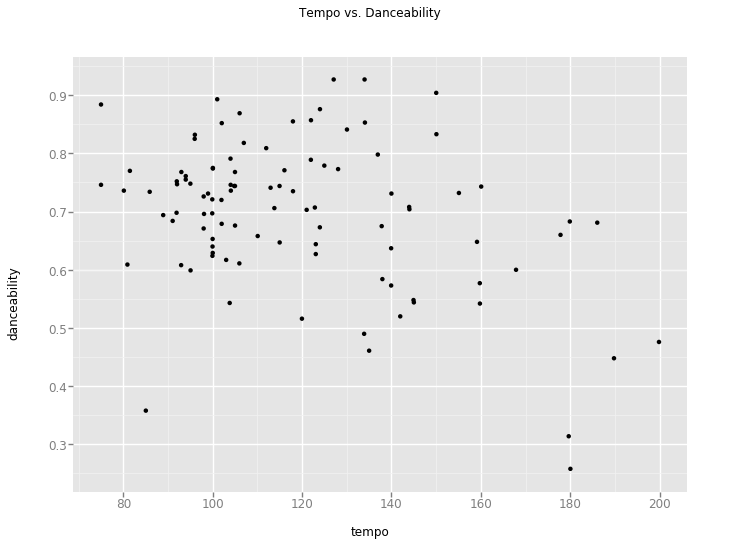

<ggplot: (314949566)>

In [12]:
#exploring the audio features of top songs 2017 first
ggplot(data=df, aesthetics=aes(x='tempo',y='danceability')) +geom_point() +ggtitle("Tempo vs. Danceability")



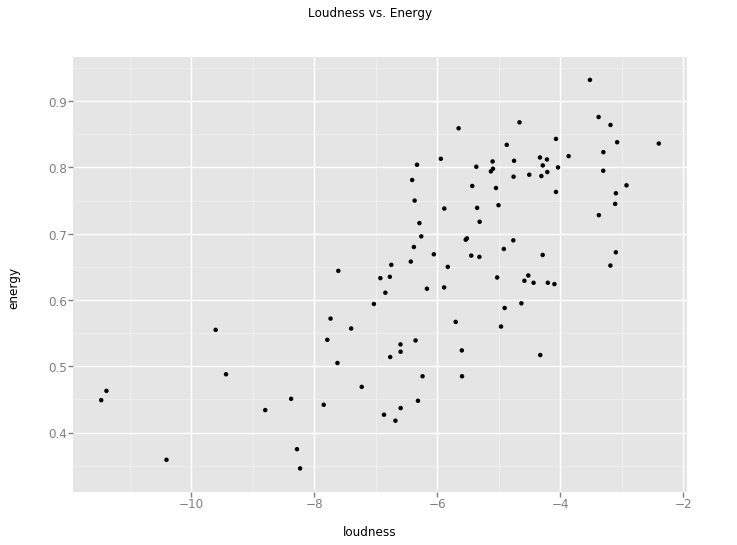

<ggplot: (-9223372036539403881)>

In [13]:
ggplot(data=df, aesthetics=aes(x='loudness',y='energy')) +geom_point() +ggtitle("Loudness vs. Energy")

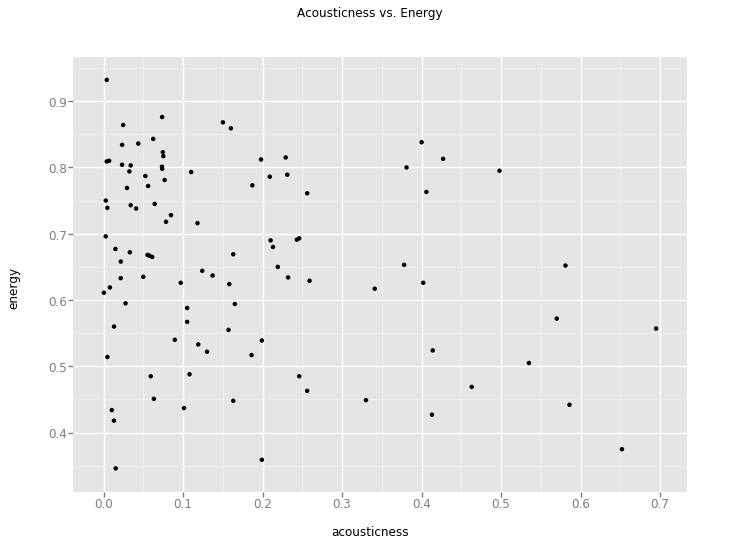

<ggplot: (315587532)>

In [14]:
ggplot(data=df, aesthetics=aes(x='acousticness',y='energy')) +geom_point() +ggtitle("Acousticness vs. Energy")

In [15]:
#prepping mevsworld dataframe to compare my music to top music of 2017!!

mytoptempadd = pd.DataFrame(["me"]*len(topsongsdf2), columns=["category"])
mytoptemp = mytoptempadd.join(topsongsdf2)
mytoptemp = mytoptemp.reset_index(drop=True)
#mevsworld = 
mytoptemp

worldtempadd = pd.DataFrame(["Top Songs of 2017"]*len(df), columns=["category"])
worldtemp = worldtempadd.join(df)
worldtemp = worldtemp.reset_index(drop=True)
worldtemp

#I have to do this because these two dfs are not the same in terms of how columns are aligned
columnstoplot = ['danceability','energy','key','loudness','mode','speechiness','acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo','duration_ms','time_signature']

mevsworld = mytoptemp.append(worldtemp)

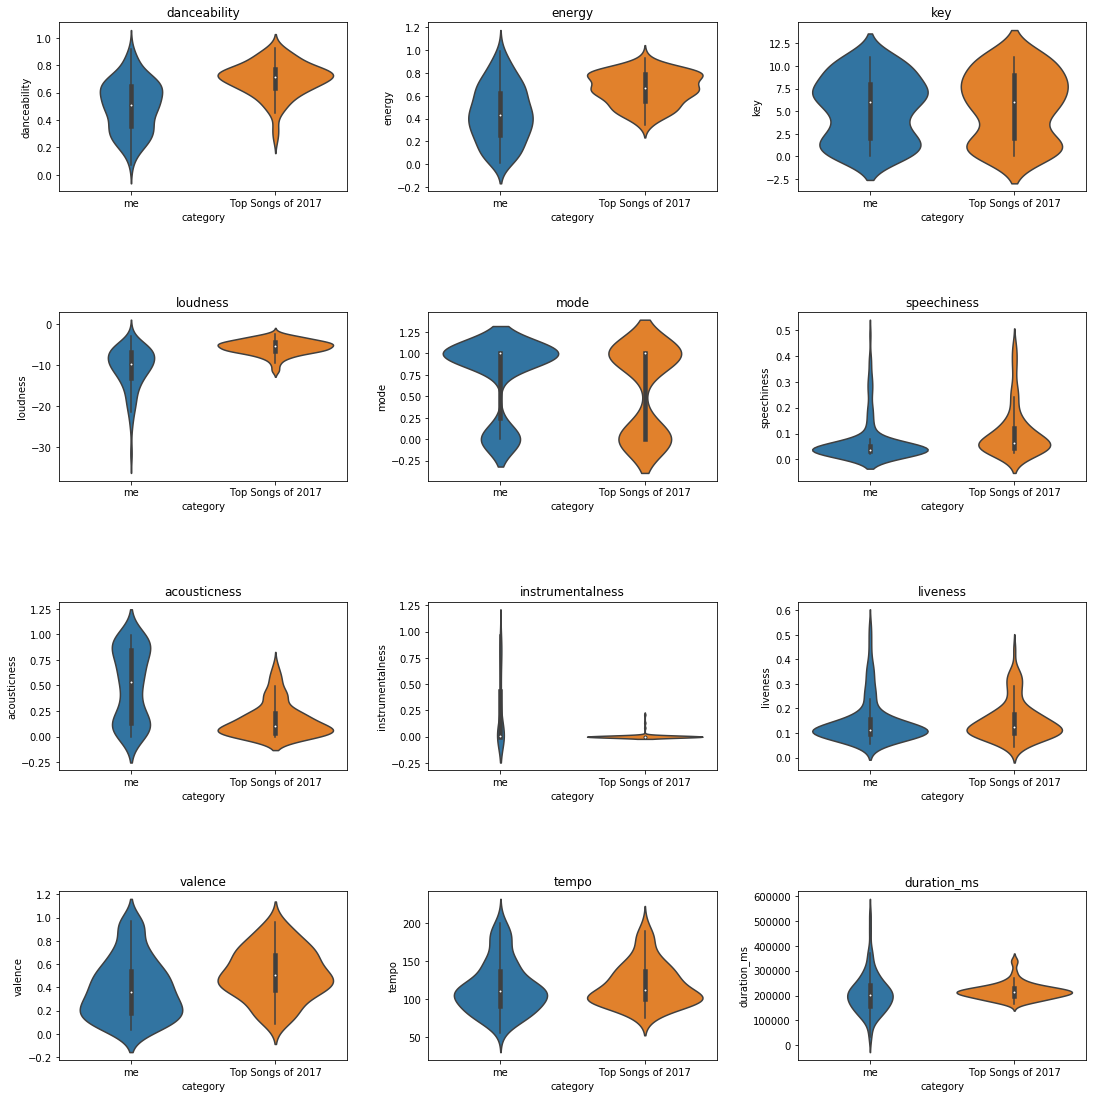

In [16]:
#I have to do this because these two dfs are not the same in terms of how columns are aligned
#columnstoplot = ['danceability','energy','key','loudness','mode','speechiness','acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo','duration_ms','time_signature']

fig, axes = plt.subplots(4,3, figsize=(15,15))
fig.tight_layout(h_pad = 10, w_pad = 5)
index = [0] #these are the columns that can be compared
i =0
for triaxis in axes:
    for axis in triaxis:
        sns.violinplot(x='category', y= columnstoplot[i], data=mevsworld, ax=axis) 
        axis.set_title(columnstoplot[i])
       # axis.scatter(columnstoplot[i], ax=axis)
        i += 1
plt.show()


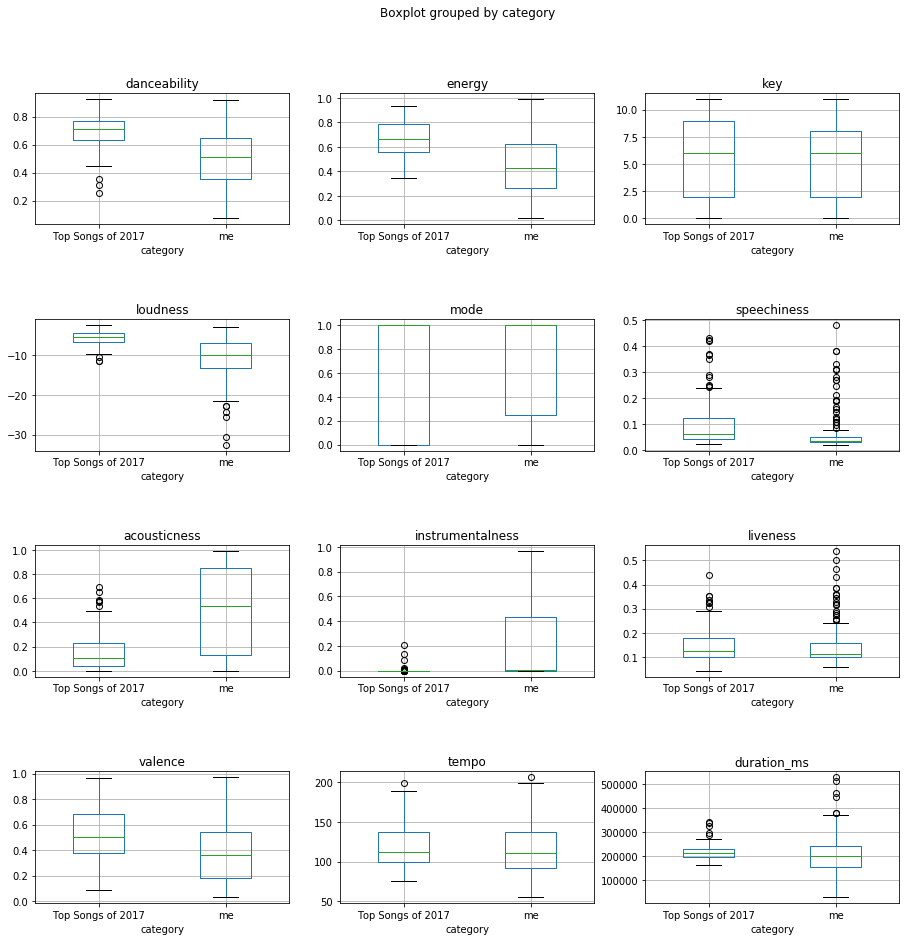

In [17]:
#I have to do this because these two dfs are not the same in terms of how columns are aligned
#columnstoplot = ['danceability','energy','key','loudness','mode','speechiness','acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo','duration_ms','time_signature']

fig, axes = plt.subplots(4,3, figsize=(15,15))
fig.tight_layout(h_pad = 10)
index = [0] #these are the columns that can be compared
i =0
for triaxis in axes:
    for axis in triaxis:
   #     plt.boxplot(topsongsdf2[columnstoplot[i]].tolist(),positions=[10],widths=150)
   #     plt.boxplot(df[columnstoplot[i]].tolist(),positions=[100],widths=150)
   #     plt.show()
        mevsworld.boxplot(column = columnstoplot[i], by = 'category',widths = 0.4, showcaps=True, showbox=True, ax=axis)
 #       df[columnstoplot[i]].plot(kind='box', ax=axis, positions = [20], widths = 0.4)

        i += 1
plt.show()
#topsongsdf2.columns[10]

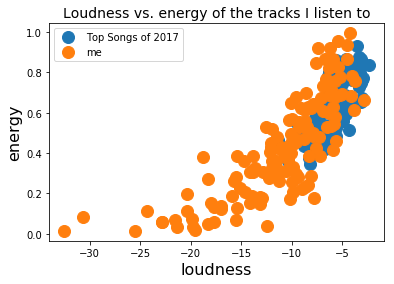

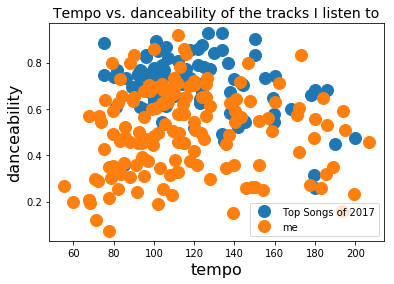

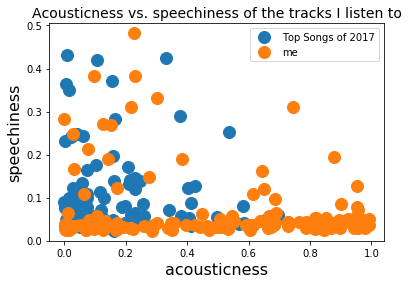

In [18]:
#comparing TWO variables with the three groups
#didn't do subplots because I need to carefully choose which x and y to compare

groups = mevsworld.groupby('category')
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.loudness, group.energy, marker='o', linestyle='', ms=12, label=name)
    ax.set_title(name)
#ax.plot(df.loudness, df.energy, marker='o', linestyle='', ms=12)
ax.set_title("Loudness vs. energy of the tracks I listen to", fontsize = 14)
plt.xlabel("loudness", fontsize = 16)
plt.ylabel("energy", fontsize = 16)
ax.legend()

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.tempo, group.danceability, marker='o', linestyle='', ms=12, label=name)
    ax.set_title(name)
ax.set_title("Tempo vs. danceability of the tracks I listen to", fontsize = 14)
plt.xlabel("tempo", fontsize = 16)
plt.ylabel("danceability", fontsize = 16)
ax.legend()

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
  #  print(group.mode, "$$$$$$$$$$$", group.danceability)
    ax.plot(group.acousticness, group.speechiness, marker='o', linestyle='', ms=12, label=name)
  #  ax.set_title(name)
ax.set_title("Acousticness vs. speechiness of the tracks I listen to", fontsize = 14)
plt.xlabel("acousticness", fontsize = 16)
plt.ylabel("speechiness", fontsize = 16)
ax.legend()


#### Statistics

In [19]:
groups = mevsworld.groupby('category')
columnstoplot = ['danceability','energy','key','loudness','mode','speechiness','acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo','duration_ms','time_signature']
for i in columnstoplot:
    mey = []
    topy = []
    for name, group in groups:
        if name == "me":
            mey.append(group[i])
        if name == "Top Songs of 2017":
            topy.append(group[i])
#    print(i, creaty)
    mw = stats.mannwhitneyu(mey[0], topy[0])
    print("P-value for the Mann-Whitney test between my tracks and top songs of 2017's ", i, " is: ",mw[1])

P-value for the Mann-Whitney test between my tracks and top songs of 2017's  danceability  is:  6.379560687266153e-17
P-value for the Mann-Whitney test between my tracks and top songs of 2017's  energy  is:  5.335591862265478e-13
P-value for the Mann-Whitney test between my tracks and top songs of 2017's  key  is:  0.2866597626084483
P-value for the Mann-Whitney test between my tracks and top songs of 2017's  loudness  is:  8.434249543991747e-22
P-value for the Mann-Whitney test between my tracks and top songs of 2017's  mode  is:  0.002882106655902971
P-value for the Mann-Whitney test between my tracks and top songs of 2017's  speechiness  is:  6.975352875162902e-11
P-value for the Mann-Whitney test between my tracks and top songs of 2017's  acousticness  is:  4.30160447179082e-14
P-value for the Mann-Whitney test between my tracks and top songs of 2017's  instrumentalness  is:  2.580794623713988e-21
P-value for the Mann-Whitney test between my tracks and top songs of 2017's  liveness

#### Analysis 

Above, I plotted many different attributes that I thought might have some correlation in some way based on the name and the description of the attribute. For example, it seems like there is some relationship between loudness and energy, but the graph for tempo and danceability makes it seem like there is not much relationship there. I could keep going with this data, observing and analyzing relationships between different tracks and their attributes. However, as mentioned in my presentation, while this data revealed some information about what kind of music is popular in 2017 and their relatioinships, I decided to take a different turn in my project, and decided to compare my music to the top music. Compared to the top songs, the tracks I listen to overtime seem to be less "danceable", have less "energy", are lower in "loudness", a little bit less "speechy", more "acoustic", more "instrumentalness", more variance in "liveness", and more variance in duration of the song. Comparing the loudness and energy, there seems to be a very strong correlation between loudness and energy. My music vary more in terms of energy and loudness, and it also seems like my music are less in those two than those of top songs. For "tempo vs. danceability", the tracks I listen to seem to be roughly  equally as danceable, but not necessarily as high tempo as the top songs of 2017 are. There doesn't seem like there is a relationship between danceability and tempo, though. Lastly, I compared speechiness and acousticness. It seems like the tracks I listen to are definitely less speechy than the top songs of 2017, which seems to make sense because top songs consists a lot of hip-hop tracks that I have listened to less and less over the years. However, in terms of acoustiness, I am roughly in line with the those of top tracks of 2017. Using more statistically-based methods, I chose Mann-Whitney test. I did this because we needed a non-parametric test because we weren't sure that our data was normal, thus we are able to see if the differences between my music and the top songs of 2017 differ significantly. Mann-Whitney is good for comparing two variables, as it gives us an array of p-values that shows us which one differs. Depending on where our p-value cutoff is, danceability, loudness, energy, speechiness, acousticness, instrumentalness, valence and time signature between my top songs of 2017 and my tracks differ if our cutoff was p-value = .10 OR .05! Using statistical approach, that's 8 categories out of 12 where my tracks differ significantly from the top songs.

#### 3. How good am I at guessing my own music taste?


In [34]:
#printing all the playlists I own first, this must be playlists I created. 

sp = spotipy.Spotify()  
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret) 
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) 
sp.trace=False 
username = '1220915143'
username = '1252457664'

playlists = sp.user_playlists('1252457664')

while playlists:
    for i, playlist in enumerate(playlists['items']):
        print("%4d %s %s" % (i + 1 + playlists['offset'], playlist['uri'],  playlist['name']))
    if playlists['next']:
        playlists = sp.next(playlists)
    else:
        playlists = None
#playlist = sp.user_playlist("geomcintire", "PLAYLIST ID") 
#songs = playlist["tracks"]["items"] 
#ids = [] 
#for i in range(len(songs)): 
#    ids.append(songs[i]["track"]["id"]) 
#features = sp.audio_features(ids) 
#df = pd.DataFrame(features)


   1 spotify:user:1252457664:playlist:0HaYfAQ0LKKFpWz9MjEclm indiesm
   2 spotify:user:1252457664:playlist:5Z02DWJy5UNXacYtAhjDP8 wait the japanese make music too
   3 spotify:user:1252457664:playlist:7ruUN3wErWlylTYTiTYk4Q ajk jan-feb
   4 spotify:user:1252457664:playlist:7eGbZos8XQmFRVD5DtD88U wow
   5 spotify:user:1252457664:playlist:73lqXO7rdS40ZVHVDGcQzV Various Artists – Call Me by Your Name (Original Motion Picture Soundtrack)
   6 spotify:user:1252457664:playlist:3z4llb6oBc9DgKSKkNYNR2 February 2018
   7 spotify:user:1252457664:playlist:4Csitw9XtqJdibwX0XiAF2 January 2018
   8 spotify:user:1252457664:playlist:7nzxC0uxJLo64aQCMQBswn davis got blurry
   9 spotify:user:1252457664:playlist:3q3m1Npiw1GMkATaet11gg SLINKY
  10 spotify:user:1252457664:playlist:6RG4biVRmDgJUSuu6OIDOh hurry up
  11 spotify:user:1252457664:playlist:7raPOl40JPpHjeri1mOkRo thanks tyler
  12 spotify:user:1252457664:playlist:6K0yGDfqNP5sxXn80RtOuR wait theres more
  13 spotify:user:1252457664:playlist:76eeQZx

 151 spotify:user:1252457664:playlist:2r09Be5yU3rmBNOjPVymVO dec 2014-march 2015
 152 spotify:user:1252457664:playlist:6ZclQV7m9jPBQTls2oP946 ocean mountain forest stream
 153 spotify:user:1252457664:playlist:3CDgNJOocRyGdbYureFORe remixable
 154 spotify:user:1252457664:playlist:4NakMT7cHdvs0CkFVRUGDv listen
 155 spotify:user:pauldahill:playlist:5Zp8IBwAg3GbTzKiehZUpx WOODY ALLEN: Movie Soundtrack OST
 156 spotify:user:1252457664:playlist:50SI6mMEouWKByfWbcuTXm Guardians of Galaxy awesome mix
 157 spotify:user:1243316218:playlist:0EE84lIYQIj7VtxEF6crEH Starred
 158 spotify:user:abkcorecords:playlist:2xAdZkPDk7uX9bcfa6zQOs Moonrise Kingdom Soundtrack
 159 spotify:user:1252457664:playlist:0UwMmYI0t4Hd9DgofbYcG8 Roaring '20s Jazz
 160 spotify:user:1252457664:playlist:6UvRhz7RF99xwc0zRGtiNr Lazify - Cayucas - Cayucos
 161 spotify:user:1252457664:playlist:7bBCEjNHRXA0AhAB6EhAEg Lazify - Bon Iver - Flume
 162 spotify:user:1252457664:playlist:4IVVhZUJnAkJtrFQaBB9B9 Liked from Radio
 163 spoti

In [35]:
# this is the code to get playlistsdf

#playlistsdf gets all the songs from my playlist and puts it into a dataframe
# because there are 700+ songs that are in this dataframe, this code takes very long (4 minutes or so)
# that is why i commented it out because I ran it and exported it to a csv.
# I can reference it for this code without having to run this everytime
'''

playlistsdf = pd.DataFrame(columns = ['playlist_name', 'artist', 'song'])

if token:
    sp = spotipy.Spotify(auth=token)
    playlists = sp.user_playlists(username)
    for playlist in playlists['items']:
        if playlist['owner']['id'] == username:
            results = sp.user_playlist(username, playlist['id'], fields="tracks,next")
            tracks = results['tracks']
            for i, item in enumerate(tracks['items']):
                track = item['track']
           #     audio_feat = sp.audio_features(track['id'])
                ser = pd.Series([playlist['name'], track['name'],track['artists'][0]['name']], index = ['playlist_name', 'artist', 'song'])
                tid = 'spotify:track:' + track['id']
                features = sp.audio_features(tid)
                featdf = pd.Series(features[0])
                completedescript = pd.concat([ser,featdf])
                playlistsdf = playlistsdf.append(completedescript,ignore_index=True)
         #   while tracks['next']:
          #      tracks = sp.next(tracks)
           #     for i, item in enumerate(tracks['items']):
            #        track = item['track']
             #       ser = pd.Series([playlist['name'], track['name'],track['artists'][0]['name']], index = ['playlist_name', 'artist', 'song'])
              #      playlistsdf = playlistsdf.append(ser,ignore_index=True)
else:
    print("Can't get token for", username)
'''
#playlistsdf.to_csv("playlists.csv", index=False)

'\n\nplaylistsdf = pd.DataFrame(columns = [\'playlist_name\', \'artist\', \'song\'])\n\nif token:\n    sp = spotipy.Spotify(auth=token)\n    playlists = sp.user_playlists(username)\n    for playlist in playlists[\'items\']:\n        if playlist[\'owner\'][\'id\'] == username:\n            results = sp.user_playlist(username, playlist[\'id\'], fields="tracks,next")\n            tracks = results[\'tracks\']\n            for i, item in enumerate(tracks[\'items\']):\n                track = item[\'track\']\n           #     audio_feat = sp.audio_features(track[\'id\'])\n                ser = pd.Series([playlist[\'name\'], track[\'name\'],track[\'artists\'][0][\'name\']], index = [\'playlist_name\', \'artist\', \'song\'])\n                tid = \'spotify:track:\' + track[\'id\']\n                features = sp.audio_features(tid)\n                featdf = pd.Series(features[0])\n                completedescript = pd.concat([ser,featdf])\n                playlistsdf = playlistsdf.append(compl

As commented, I commented out the above code because it takes very long to run, since I found that I have 700+ songs in all of my playlists. I ran this once and exported it into a .csv. This will need to be uncommented if the csv file is not available. I will be referencing the data from the .csv file from this on.

In [22]:
#export it so we can access to it even after token is lost
#playlistsdf.to_csv("playlists.csv", index=False)
playlistsdf2 = pd.read_csv("playlists.csv")
playlistsdf2.head()

,playlist_name,artist,song,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,...,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence
0,me,Corduroy Dreams,Rex Orange County,0.653,https://api.spotify.com/v1/audio-analysis/02tv...,0.610,206975.0,0.305,02tvc9CFnTyHuSRlGeNv9w,0.0000,...,0.103,-14.037,1.0,0.0530,113.818,4.0,https://api.spotify.com/v1/tracks/02tvc9CFnTyH...,audio_features,spotify:track:02tvc9CFnTyHuSRlGeNv9w,0.222
1,me,Scales,Solange,0.593,https://api.spotify.com/v1/audio-analysis/6gO8...,0.459,219307.0,0.366,6gO8khQWeJcV7U0Kzo6Ynk,0.0137,...,0.110,-10.620,0.0,0.0578,97.104,3.0,https://api.spotify.com/v1/tracks/6gO8khQWeJcV...,audio_features,spotify:track:6gO8khQWeJcV7U0Kzo6Ynk,0.255
2,me,Madison Acid,Elvis Depressedly,0.722,https://api.spotify.com/v1/audio-analysis/6aYo...,0.596,120216.0,0.534,6aYoMFeJveewCyZS2cWGEM,0.0224,...,0.122,-7.503,1.0,0.0289,120.013,4.0,https://api.spotify.com/v1/tracks/6aYoMFeJveew...,audio_features,spotify:track:6aYoMFeJveewCyZS2cWGEM,0.293
3,me,To You,BadBadNotGood,0.941,https://api.spotify.com/v1/audio-analysis/4CMr...,0.794,145788.0,0.297,4CMrgbzlHBRss2frjG3rTz,0.8960,...,0.180,-16.232,0.0,0.0484,120.972,4.0,https://api.spotify.com/v1/tracks/4CMrgbzlHBRs...,audio_features,spotify:track:4CMrgbzlHBRss2frjG3rTz,0.344
4,me,Ivy,SALES,0.665,https://api.spotify.com/v1/audio-analysis/3qcx...,0.746,196174.0,0.538,3qcxmCQRw3OGNwB5vMcih5,0.2220,...,0.110,-9.025,1.0,0.0282,114.997,4.0,https://api.spotify.com/v1/tracks/3qcxmCQRw3OG...,audio_features,spotify:track:3qcxmCQRw3OGNwB5vMcih5,0.370


In [23]:
#prepping mevsplaylist dataframe to compare my music to the songs I have put in playlists!!

playlisttempadd = pd.DataFrame(["created playlists"]*len(playlistsdf2), columns=["category"])
playlisttemp = playlisttempadd.join(playlistsdf2)
playlisttemp = playlisttemp.reset_index(drop=True)
playlisttemp

#I have to do this because these two dfs are not the same in terms of how columns are aligned
columnstoplot = ['danceability','energy','key','loudness','mode','speechiness','acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo','duration_ms','time_signature']

mevsplaylist = mytoptemp.append(playlisttemp)

In [24]:
mevsplaylist.head()

,acousticness,analysis_url,artist,category,danceability,duration_ms,energy,id,instrumentalness,key,...,range,song,song_name,speechiness,tempo,time_signature,track_href,type,uri,valence
0,0.9750,https://api.spotify.com/v1/audio-analysis/7pBR...,The Swingle Singers,me,0.497,183440.0,0.0173,7pBRrOvcE2ZMiR5k891vhx,0.000359,1.0,...,short_term,NaN,Largo [Harpsichord Concerto No. 5 in F minor B...,0.0394,112.632,4.0,https://api.spotify.com/v1/tracks/7pBRrOvcE2ZM...,audio_features,spotify:track:7pBRrOvcE2ZMiR5k891vhx,0.2590
1,0.8680,https://api.spotify.com/v1/audio-analysis/0TcA...,Emily Yacina,me,0.454,132261.0,0.0714,0TcAUHfV9Nt2y5sUowxkCA,0.000043,4.0,...,short_term,NaN,Good Graces,0.0295,94.070,4.0,https://api.spotify.com/v1/tracks/0TcAUHfV9Nt2...,audio_features,spotify:track:0TcAUHfV9Nt2y5sUowxkCA,0.2340
2,0.2180,https://api.spotify.com/v1/audio-analysis/77IA...,J. Cole,me,0.713,316920.0,0.4960,77IAeEz8LEchPN8UNjaTJ2,0.000237,7.0,...,short_term,NaN,Foldin Clothes,0.3110,162.039,4.0,https://api.spotify.com/v1/tracks/77IAeEz8LEch...,audio_features,spotify:track:77IAeEz8LEchPN8UNjaTJ2,0.6000
3,0.0154,https://api.spotify.com/v1/audio-analysis/2Pxy...,The Korgis,me,0.425,251947.0,0.2980,2PxyiPwogw6C9yu1jRgFiA,0.001330,1.0,...,short_term,NaN,Everybody's Got To Learn Sometime,0.0258,75.038,4.0,https://api.spotify.com/v1/tracks/2PxyiPwogw6C...,audio_features,spotify:track:2PxyiPwogw6C9yu1jRgFiA,0.0929
4,0.9830,https://api.spotify.com/v1/audio-analysis/6Nw7...,George Frideric Handel,me,0.356,243067.0,0.0336,6Nw7jagICoXFt1ZtdAbi8o,0.864000,2.0,...,short_term,NaN,"Harpsichord Suite No. 11 in D minor, HWV 437 (...",0.0435,139.584,3.0,https://api.spotify.com/v1/tracks/6Nw7jagICoXF...,audio_features,spotify:track:6Nw7jagICoXFt1ZtdAbi8o,0.2100


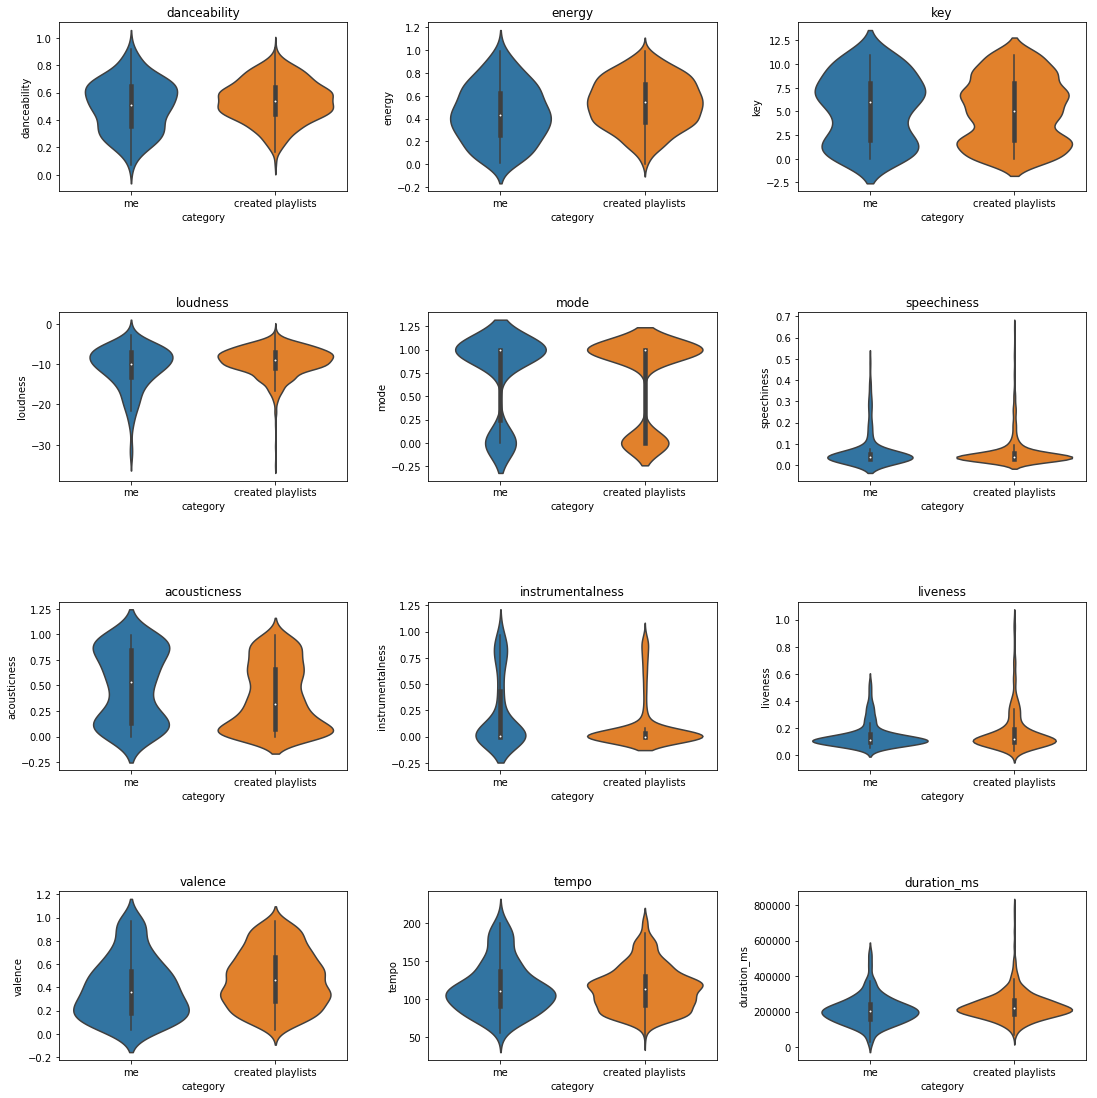

In [25]:
#I have to do this because these two dfs are not the same in terms of how columns are aligned

fig, axes = plt.subplots(4,3, figsize=(15,15))
fig.tight_layout(h_pad = 10, w_pad = 5)
index = [0] #these are the columns that can be compared
i =0
for triaxis in axes:
    for axis in triaxis:
        sns.violinplot(x='category', y= columnstoplot[i], data=mevsplaylist, ax=axis) 
        axis.set_title(columnstoplot[i])
       # axis.scatter(columnstoplot[i], ax=axis)
        i += 1
plt.show()


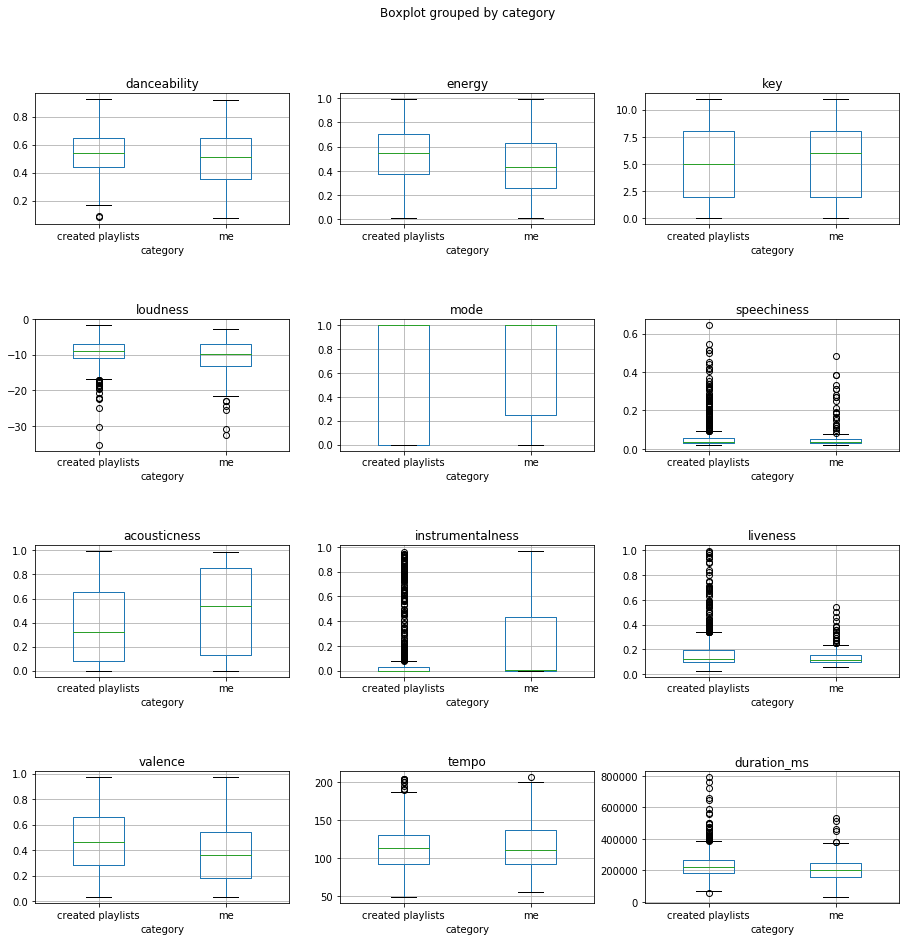

In [26]:
#I have to do this because these two dfs are not the same in terms of how columns are aligned
#columnstoplot = ['danceability','energy','key','loudness','mode','speechiness','acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo','duration_ms','time_signature']

fig, axes = plt.subplots(4,3, figsize=(15,15))
fig.tight_layout(h_pad = 10)
index = [0] #these are the columns that can be compared
i =0
for triaxis in axes:
    for axis in triaxis:
   #     plt.boxplot(topsongsdf2[columnstoplot[i]].tolist(),positions=[10],widths=150)
   #     plt.boxplot(df[columnstoplot[i]].tolist(),positions=[100],widths=150)
   #     plt.show()
        mevsplaylist.boxplot(column = columnstoplot[i], by = 'category',widths = 0.4, showcaps=True, showbox=True, ax=axis)
 #       df[columnstoplot[i]].plot(kind='box', ax=axis, positions = [20], widths = 0.4)

        i += 1
plt.show()
#topsongsdf2.columns[10]

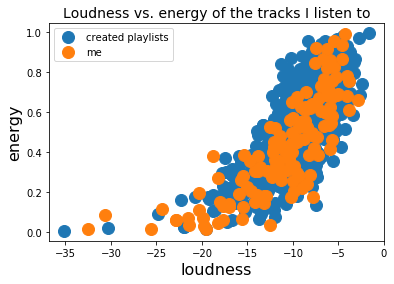

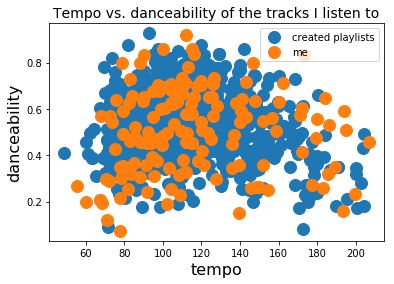

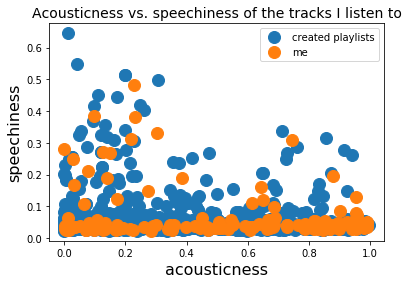

In [27]:
#comparing TWO variables with the three groups
#didn't do subplots because I need to carefully choose which x and y to compare

groups = mevsplaylist.groupby('category')
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.loudness, group.energy, marker='o', linestyle='', ms=12, label=name)
    ax.set_title(name)
#ax.plot(df.loudness, df.energy, marker='o', linestyle='', ms=12)
ax.set_title("Loudness vs. energy of the tracks I listen to", fontsize = 14)
plt.xlabel("loudness", fontsize = 16)
plt.ylabel("energy", fontsize = 16)
ax.legend()

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.tempo, group.danceability, marker='o', linestyle='', ms=12, label=name)
    ax.set_title(name)
ax.set_title("Tempo vs. danceability of the tracks I listen to", fontsize = 14)
plt.xlabel("tempo", fontsize = 16)
plt.ylabel("danceability", fontsize = 16)
ax.legend()

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
  #  print(group.mode, "$$$$$$$$$$$", group.danceability)
    ax.plot(group.acousticness, group.speechiness, marker='o', linestyle='', ms=12, label=name)
  #  ax.set_title(name)
ax.set_title("Acousticness vs. speechiness of the tracks I listen to", fontsize = 14)
plt.xlabel("acousticness", fontsize = 16)
plt.ylabel("speechiness", fontsize = 16)
ax.legend()

#### Statistics

In [28]:
groups = mevsplaylist.groupby('category')
columnstoplot = ['danceability','energy','key','loudness','mode','speechiness','acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo','duration_ms','time_signature']
for i in columnstoplot:
    mey = []
    creaty = []
    for name, group in groups:
        if name == "me":
            mey.append(group[i])
        if name == "created playlists":
            creaty.append(group[i])
#    print(i, creaty)
    mw = stats.mannwhitneyu(mey[0], creaty[0])
    print("P-value for the Mann-Whitney test between my tracks and created playlist's", i, "is: ",mw[1])

P-value for the Mann-Whitney test between my tracks and created playlist's danceability is:  0.022805493669476897
P-value for the Mann-Whitney test between my tracks and created playlist's energy is:  5.422576414865564e-06
P-value for the Mann-Whitney test between my tracks and created playlist's key is:  0.2234022763036187
P-value for the Mann-Whitney test between my tracks and created playlist's loudness is:  0.0033926712281524933
P-value for the Mann-Whitney test between my tracks and created playlist's mode is:  0.1771778501571074
P-value for the Mann-Whitney test between my tracks and created playlist's speechiness is:  0.35671755715338
P-value for the Mann-Whitney test between my tracks and created playlist's acousticness is:  1.4548544733793819e-05
P-value for the Mann-Whitney test between my tracks and created playlist's instrumentalness is:  3.911664965679977e-06
P-value for the Mann-Whitney test between my tracks and created playlist's liveness is:  0.05456794498831849
P-valu

#### Analysis

In order to find whether I am good at guessing my own music taste, I compared the music I put manually into playlists and compared the features of these tracks to all the tracks I listen to. Just from looking at the plots, it seems like I don't do a bad job. The median key of my created playlists is much lower than what I listen to, but it is around the same ballpark for the IQR.Additionally, speechiness differs/varies a lot more in my playlists than what I actually listen to. Other than that, I would say that just by looking at the visualization, I do a pretty good at making playlists that I like.  The two variable comparisons between each group does not seem to have changed too much from my analysis in previous questions. Loudness and energy seem to have a great correlation: the louder a track is, the more energy. Comparing danceability and tempo, it seems like I don't do a bad job either. The songs I listen to may have a little big higher danceability , but I would not say there is a correlation between the two variables. As evident, I listen to songs that are less speechy. But the playlists I have curated seem to vary more in speechiness than what I actually listen to. Thinking about what this means, it totally makes sense, because I do have playlists that are dedicated to hip-hop music just because I always want to explore more of that genre. Using more statistically-based methods, I chose Mann-Whitney test. I did this because we needed a non-parametric test because we weren't sure that our data was normal, thus we are able to see if the differences between my tracks and the playlists I have created differ significantly. Mann-Whitney is good for comparing two variables, as it gives us an array of p-values that shows us which one differs. Depending on where our p-value cutoff is, mode, valence, duration, instrumentalness, speechiness, loudness, and danceability between my tracks and the playlists I have created differ if our cutoff was p-value = .10. If our cutoff is at .05, loudness, mode, duration, instrumentalness, speechiness,and danceability between my tracks and the playlists I have created differ. Using statistical approach, that's 6 categories out of 12 where my tracks differ significantly from the playlists I create, way better than the comparison with the top songs. Overall, I would say that the playlists I create seem to relatively aligned with what I like to listen to and the audio features that I generally listen to without these playlists. Something I would say that is underlying is that I do, a lot of the time, listen to music based solely on the music playlists I make because I know I like them. However, this analysis might mean that I should explore more music that is outside my playlists and outside of what I like. 

### 4. How good is Spotify at guessing and recommending me music?

#### Data Exploration

In [29]:
discoverdf = playlistsdf2[playlistsdf2.playlist_name == 'MY MUSIC TASTE 2018']
discoverdf = discoverdf.reset_index(drop=True)
#prepping mevsworld dataframe to compare my music to top music of 2017!!

discovertempadd = pd.DataFrame(["Discover Weekly"]*len(discoverdf), columns=["category"])
discovertemp = discovertempadd.join(discoverdf)
discoverdf

#I have to do this because these two dfs are not the same in terms of how columns are aligned
columnstoplot = ['danceability','energy','key','loudness','mode','speechiness','acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo','duration_ms','time_signature']

mevsdiscover = mytoptemp.append(discovertemp)

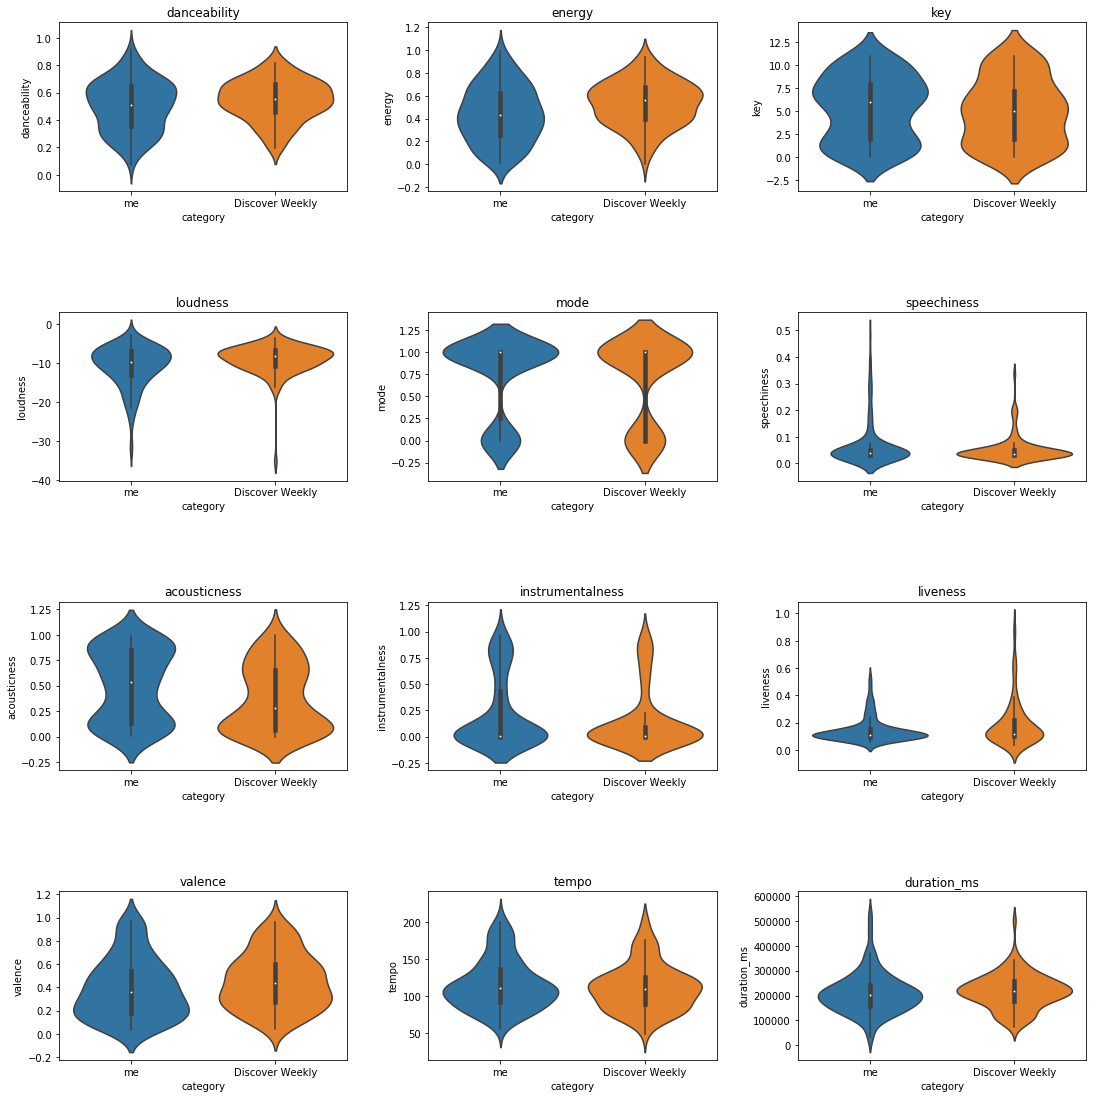

In [30]:
#I have to do this because these two dfs are not the same in terms of how columns are aligned

fig, axes = plt.subplots(4,3, figsize=(15,15))
fig.tight_layout(h_pad = 10, w_pad = 5)
index = [0] #these are the columns that can be compared
i =0
for triaxis in axes:
    for axis in triaxis:
        sns.violinplot(x='category', y= columnstoplot[i], data=mevsdiscover, ax=axis) 
        axis.set_title(columnstoplot[i])
       # axis.scatter(columnstoplot[i], ax=axis)
        i += 1
plt.show()


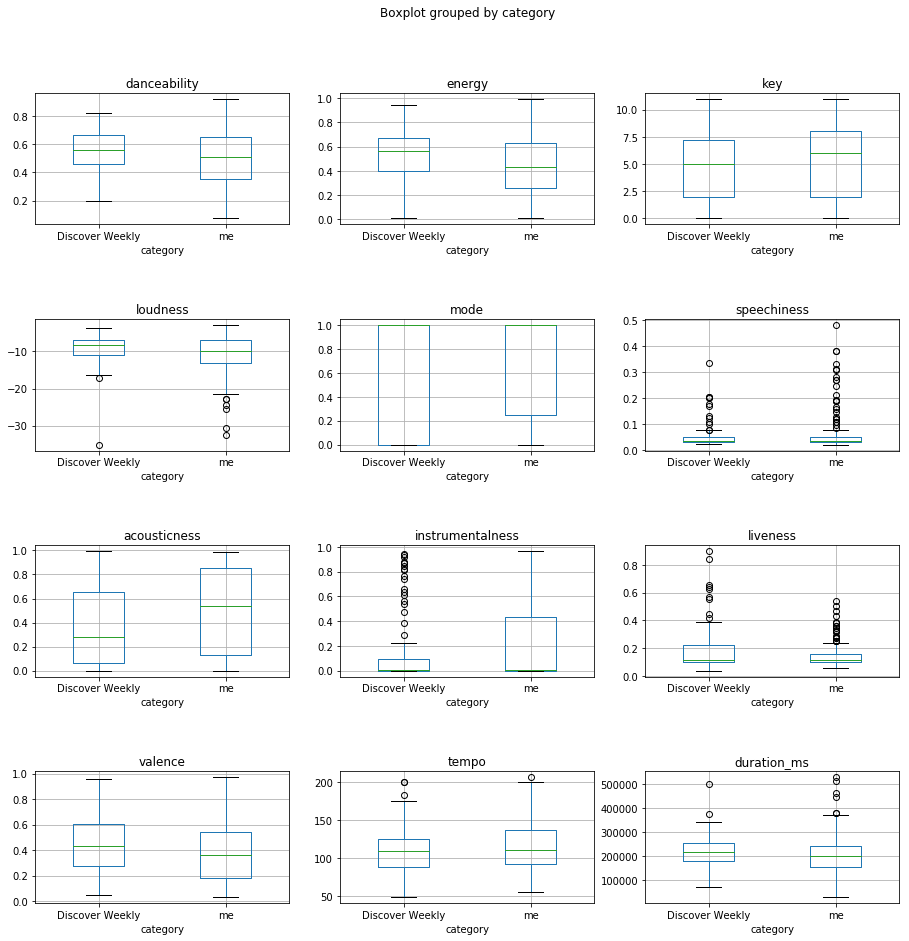

In [31]:
#comparing my and discover weekly

#BOXPLOT
fig, axes = plt.subplots(4,3, figsize=(15,15))
fig.tight_layout(h_pad = 10)
index = [3,5,6, 7,9,10,11,12,13,14,15,16] #these are the columns that can be compared
i =0
for triaxis in axes:
    for axis in triaxis:
            mevsdiscover.boxplot(column = columnstoplot[i], by = 'category',widths = 0.4, showcaps=True, showbox=True, ax=axis)
            i += 1
plt.show()
#topsongsdf2.columns[10]

#### Statistics

In [32]:
groups = mevsdiscover.groupby('category')
columnstoplot = ['danceability','energy','key','loudness','mode','speechiness','acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo','duration_ms','time_signature']
for i in columnstoplot:
    mey = []
    discovery = []
    for name, group in groups:
        if name == "me":
      #      print(group[i])
            mey.append(group[i])
        if name == "Discover Weekly":
         #   print(group[i])
            discovery.append(group[i])
    #print(i, discovery)
    mw = stats.mannwhitneyu(mey[0], discovery[0])
    print("P-value for the Mann-Whitney test between my tracks and Spotify's recommended playlist ", i, " is: ",mw[1])

P-value for the Mann-Whitney test between my tracks and Spotify's recommended playlist  danceability  is:  0.047355980842275734
P-value for the Mann-Whitney test between my tracks and Spotify's recommended playlist  energy  is:  0.0011919869127876002
P-value for the Mann-Whitney test between my tracks and Spotify's recommended playlist  key  is:  0.213663966167707
P-value for the Mann-Whitney test between my tracks and Spotify's recommended playlist  loudness  is:  0.007742099921112386
P-value for the Mann-Whitney test between my tracks and Spotify's recommended playlist  mode  is:  0.2091008248221612
P-value for the Mann-Whitney test between my tracks and Spotify's recommended playlist  speechiness  is:  0.29150641242162517
P-value for the Mann-Whitney test between my tracks and Spotify's recommended playlist  acousticness  is:  0.000701841647672254
P-value for the Mann-Whitney test between my tracks and Spotify's recommended playlist  instrumentalness  is:  0.46015369676802326
P-valu

### Analysis

From the plots and visualizations, it looks like key and speechiness are what differ most. I seem to prefer less instrumental tracks than Spotify recommends. The other attributes seem pretty spot on. I had really high hopes of this analysis because Spotify is prides itself on being very data driven. We will see if this is the case using statistical methods. Depending on where our p-value cutoff is, loudness, speechiness, instrumentalness are the only three categories that differ between my tracks and Spotify's recommended Discover Weekly if p-value cutoff is .05! Using statistical approach, that's 3 categories out of 12 where my tracks differ significantly from the top songs. THAT IS PRETTY GOOD, compared to the top songs and what playlists I create. This might mean that Spotify is better at guessing what kind of music I like based on what I have listened to than I have! Three categories compared to six categories that differ significantly is a lot less. This makes sense because Spotify uses an algorithm to create these playlists. A caveat that may be underlying is that Spotify might not necessarily encompass my music wholly, as I use other music platforms. Spotify is what I use mostly, but further analysis will be needed for a more definite conclusion.

## Conclusion

All in all, this was the most rewarding project I have ever done. I spent 20+ hours trying to figure out how to properly implement the API, use the package, and get exactly what I want. <br> 
In a list format... <br> <br>
Looking at #1, at how my music has changed over the years, it is pretty evident that it has. To summarize, it seems like most of my music has decreased in speechiness, tempo, energy, and danceability seemed to have decreased in both short-term and as I have gotten older. Statistically, loudness, duration, instrumentalness, and time signature differ significantly at p = 0.05. I noted that this made sense to me because I listened to more pop and hip-hop music when I was younger. However, the older I am, I feel like I have dabbled more into rock and lo-fi music that tend to be more less "upbeat" than contemporary pop and hip-hop. <br>
Looking at #2, at how my music compares to the top songs, it seems like this differs more drastically than the others. 
Danceability, loudness, energy, speechiness, acousticness, instrumentalness, valence and time signature between my top songs of 2017 and my tracks differ if our cutoff was p = .05, which is 8 categories out of 12! This would make sense because I don't listen to top hits or the radio too much.
<br>
Looking at #3, at how my music compares to my tracks I have put in my playlist, it seems like I don't do a bad job at categorizing and knowing my own music. If our cutoff is at .05, loudness, mode, duration, instrumentalness, speechiness,and danceability between my tracks and the playlists I have created differ significantly, which is 6 out of 12 categories. This is better than comparing my songs with the top tracks. I also noted discrepancies and possible underlying factors, because I listen to music from playlists a lot of the time because it's easier, so this might skew the results.
<br>
Looking at #4, at how my music compares to tracks Spotify recommends me, it seems like they do the best job at knowing my music. Loudness, speechiness, instrumentalness are the only three categories that differ between my tracks and Spotify's recommended Discover Weekly if p-value cutoff is .05! That's 3 categories out of 12! This makes sense because Spotify also prides itself in being data driven.
<br>
<br>
I am still kind of bummed to say that Spotify might know me more than I know myself, but I would like to say that further analysis should be made in order to come up with a more confident conflusion! To further this project, I want to explore how Spotify makes the "Daily Mix" playlists where they look at what you have been listening to and making different mixes off of those different genres. I also want to look at how Spotify categorizes tracks into different genres. There is a lot in the Spotify API and functions made in the Spotipy package that I have yet to explore, but there are so many different variables and questions to ask just from the data I extracted alone.
Through this project, I learned how Spotify API works, how powerful the Spotipy package is, and how user authorization can get painful but extremely necessary for APIs. Thank you so much for your time! Woo!

## Appendix

#### range 
Over what time frame the affinities are computed. Valid values: long_term (calculated from several years of data and including all new data as it becomes available), medium_term (approximately last 6 months), short_term (approximately last 4 weeks).
: String

#### Category
Valid values:
"me" means my tracks that I listen to that Spotify has compiled
"Top songs 2017" means top tracks of 2017 taken from features.csv
"created playlists" means the tracks that I have manually put in playlists for Spotify
: String

#### Spotify URI of the song
: String

#### Name of the song
:String

#### Artist(s) of the song
:String

####  Danceability
describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
<br>:Numeric

#### Energy
is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
<br>:Numeric

#### Key
The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.
<br>:Numeric


#### loudness
:The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.
<br>:Numeric


#### mode
Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
<br>:Numeric


#### speechiness
Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
<br>:Numeric


#### acousticness
A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
<br>:Numeric


#### instrumentalness
Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
<br>:Numeric


#### liveness
Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
<br>:Numeric


#### valence
A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
<br>:Numeric


#### tempo
The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
<br>:Numeric


#### duration_ms
The duration of the track in milliseconds.
<br>:Numeric


#### time_signature
An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).
<br>:Numeric

from: https://developer.spotify.com/web-api/get-audio-features/

## Citation

-I got features.csv from https://www.kaggle.com/nadintamer/top-tracks-of-2017/data
<br>
-Spotipy package and documentation from https://github.com/plamere/spotipy
<br>
-Spotify developer, also where I need to get my token from https://beta.developer.spotify.com/dashboard/applications/b0ccdb01b69844b3af068c4fec4c8dc5
<br>
-Direct link to get token from https://beta.developer.spotify.com/console/get-current-user-top-artists-and-tracks/?type=artists&time_range=medium_term&limit=10&offset=5

## Just because it's kind of interesting ...

In [33]:
###NEED TO GRAB TOKEN FOR THIS TO WORK

#Just for fun, this is code gives me my top artists, long-term, medium-, and short-term
# I don't use it for this data, but this would be useful in other data analysis questions
artistsdf = pd.DataFrame(columns = ['range', 'artist'])
if token:
    sp = spotipy.Spotify(auth=token)
    sp.trace = False
    ranges = ['short_term', 'medium_term', 'long_term']
    for range in ranges:
        print("range:", range)
        results = sp.current_user_top_artists(time_range=range, limit=50)
        for i, item in enumerate(results['items']):
            print(i, item['name'])
        print
else:
    print("Can't get token for", username)

range: short_term
0 The Smiths
1 Porches
2 John Fahey
3 Parquet Courts
4 Emily Yacina
5 Danish String Quartet
6 Rhye
7 Girl Ray
8 Triathalon
9 MGMT
10 Anna McClellan
11 Ryuichi Sakamoto
12 Stars Of The Lid
13 Blanche Blanche Blanche
14 (Sandy) Alex G
15 The Swingle Singers
16 La Santa Cecilia
17 21 Savage
18 Hovvdy
19 Bing & Ruth
20 Jim Croce
21 Brian Eno
22 Banes World
23 Mild High Club
24 BROCKHAMPTON
25 Lorde
26 The Four Freshmen
27 James Blake
28 Loving
29 Joey Pecoraro
30 Thundercat
31 Julie Byrne
32 Rina Sawayama
33 Car Seat Headrest
34 Phoebe Bridgers
35 Oister
36 Nilüfer Yanya
37 Eluvium
38 Rostam
39 Joe Pass
40 Kanye West
41 Inner Wave
42 J.I.D
43 Pantha Du Prince
44 Everything Is Recorded
45 Art Tatum
46 Harold Budd
47 Gus Dapperton
48 Ravyn Lenae
49 The Shacks
range: medium_term
0 The Beach Boys
1 John Fahey
2 Drake
3 The Smiths
4 Porches
5 Kendrick Lamar
6 Parquet Courts
7 BROCKHAMPTON
8 Young Thug
9 (Sandy) Alex G
10 Emily Yacina
11 Tame Impala
12 Nils Frahm
13 Sufjan Stev